In [2]:
import pandas as pd
from helper import *
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output 

In [3]:
all_counted_themes = []

aggregated_theme_data = pd.DataFrame()

aggregated_month_data = pd.DataFrame()

aggregated_topic_data = pd.DataFrame()

file_reader = pd.read_csv('../data/final/all_data.csv', sep=';', chunksize=5e5, parse_dates=['data de abertura'])

for chunk in file_reader:
    chunk:pd.DataFrame = chunk

    chunk['year'] = chunk['data de abertura'].dt.year
    chunk['month'] = chunk['data de abertura'].dt.month

    counted_themes = chunk['tema'].value_counts()

    grouped_counted_theme = chunk.groupby(['year', 'tema']).size().reset_index(name='count')
    
    grouped_counted_monthly = chunk.groupby(['year', 'month']).size().reset_index(name='count')
    
    grouped_counted_topic = chunk.groupby(['year', 'tema', 'assunto']).size().reset_index(name='count')

    all_counted_themes.append(counted_themes)
    
    aggregated_theme_data = pd.concat([aggregated_theme_data, grouped_counted_theme], ignore_index=True)
    
    aggregated_month_data = pd.concat([aggregated_month_data, grouped_counted_monthly], ignore_index=True)
    
    aggregated_topic_data = pd.concat([aggregated_topic_data, grouped_counted_topic], ignore_index=True)

clear_output()

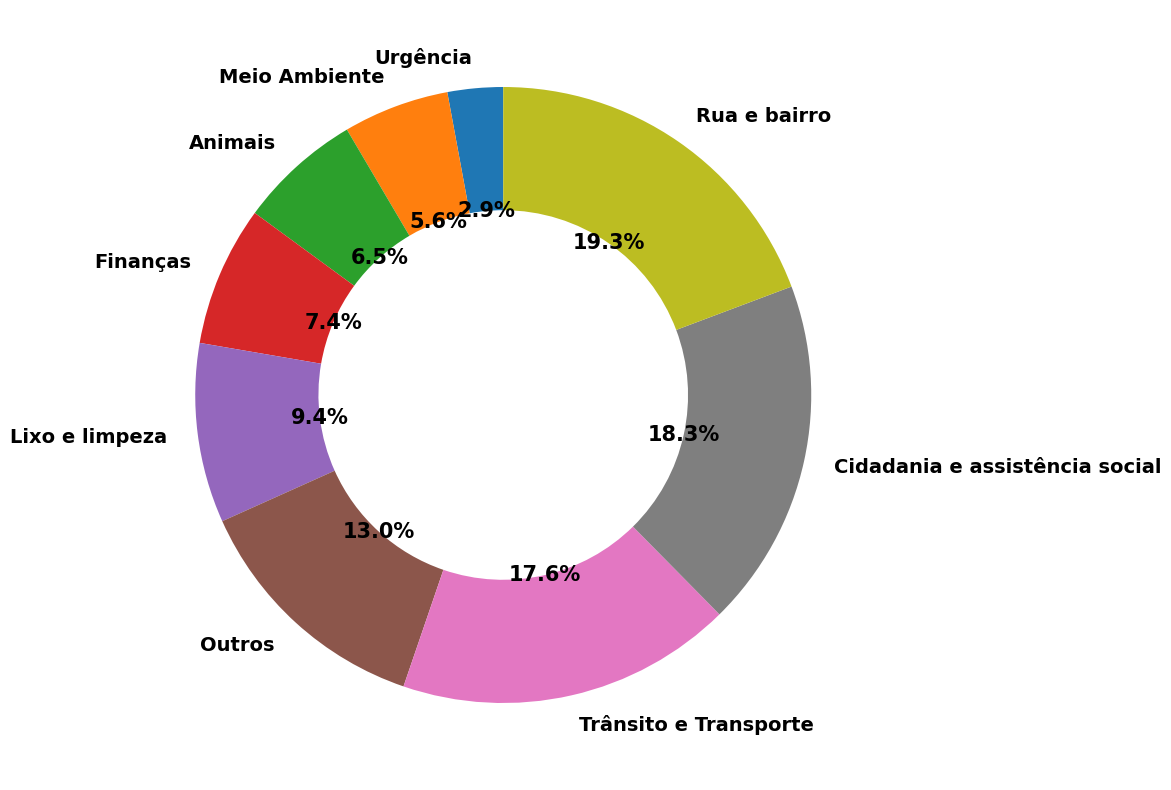

In [23]:
final_counted_themes = pd.concat(all_counted_themes).groupby(level=0).sum()

total = final_counted_themes.sum()

others = 0

tuples = []
values = []
labels = []

for theme, counter in final_counted_themes.items():
    is_valid = (counter / total) > 0.025

    if is_valid:
        values.append(counter)
        labels.append(theme)
        tuples.append((theme, counter))
    else:
        others += counter

tuples.append(("Outros", others))
sorted_tuples = list(sorted(tuples, key=lambda x: x[1]))

#Criando o gráfico de rosca
plt.figure(figsize=(10,10))


_, __, autotexts = plt.pie([x[1] for x in sorted_tuples],labels=[x[0] for x in sorted_tuples], autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4},  textprops={'fontsize': 14, 'fontweight': 'bold'})

for autotext in autotexts:
    autotext.set_fontsize(15)

plt.show()

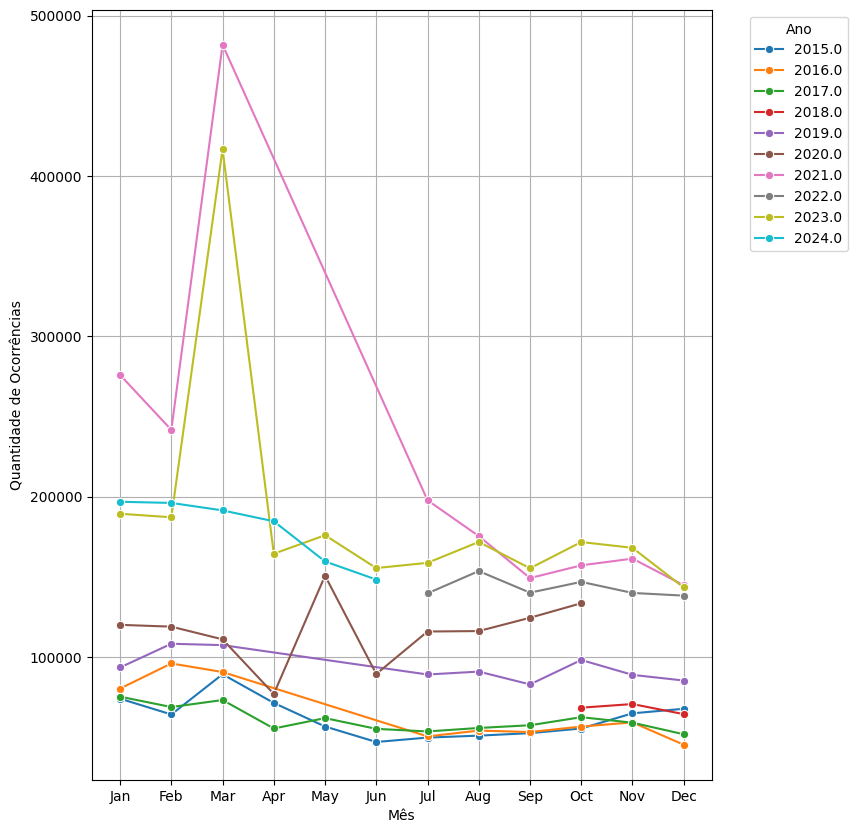

In [31]:
monthly_counts = aggregated_month_data.groupby(['year', 'month']).sum()

# Preparar os dados para o gráfico
plt.figure(figsize=(8, 10))
sns.lineplot(data=monthly_counts, x='month', y='count', hue='year', marker='o', palette='tab10')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Ocorrências')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [29]:
def chart(aggregated:pd.DataFrame, by:list[str], hue:str, title:str,limit=0.05):
    if title is None:
        title = 'Tendência na Quantidade de Chamadas por Tema ao Longo dos Anos'
    
    final_count = aggregated.groupby(by).sum().reset_index()

    total_per_year = final_count.groupby('year')['count'].sum().reset_index(name='total_count')

    final_count = final_count.merge(total_per_year, on='year')


    final_count['proportion'] = final_count['count'] / final_count['total_count']

    final_count = final_count[final_count['proportion'] >= limit]

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=final_count, x='year', y='count', hue=hue, marker='o')
    #plt.title(title)
    plt.xlabel('Ano')
    plt.ylabel('Total de Chamadas')
    plt.grid(True)
    plt.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

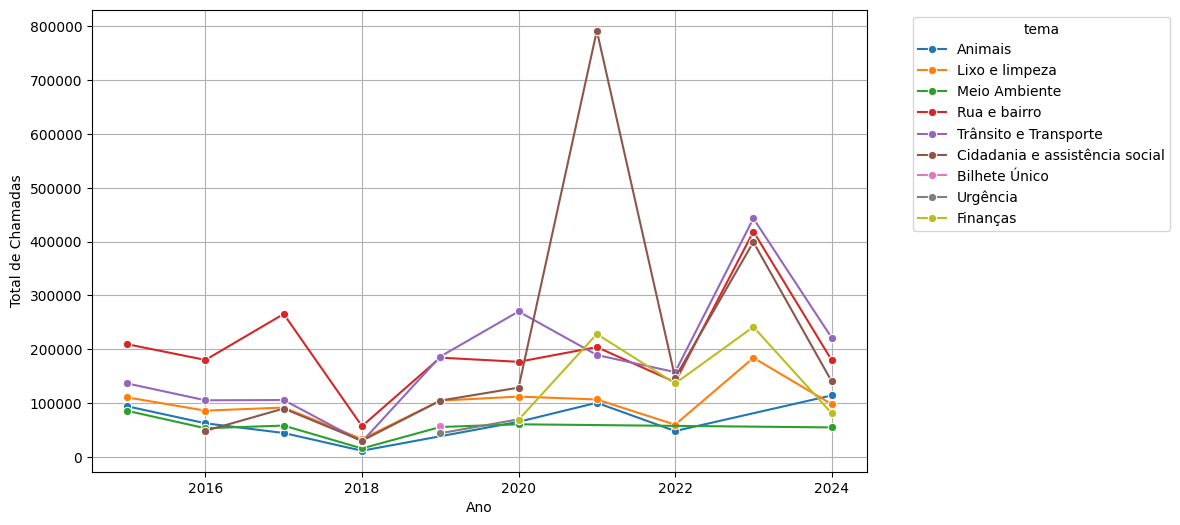

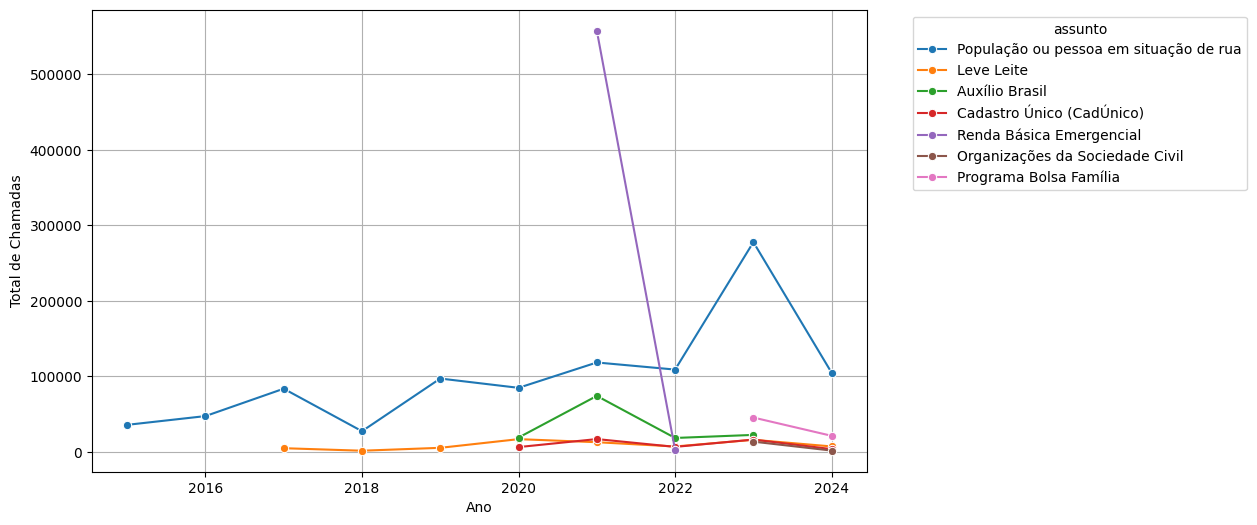

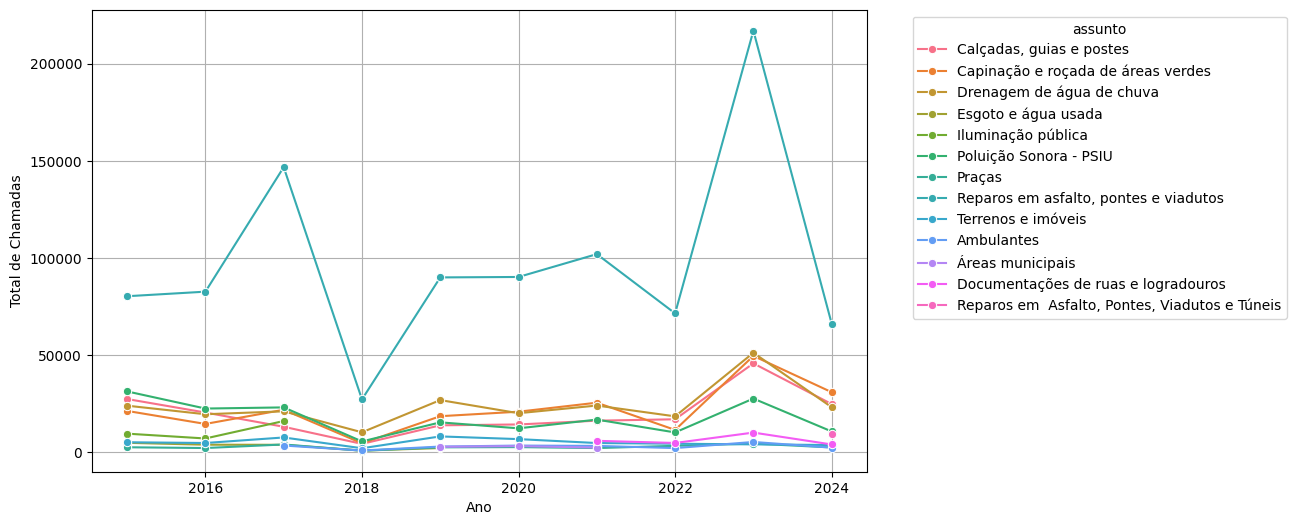

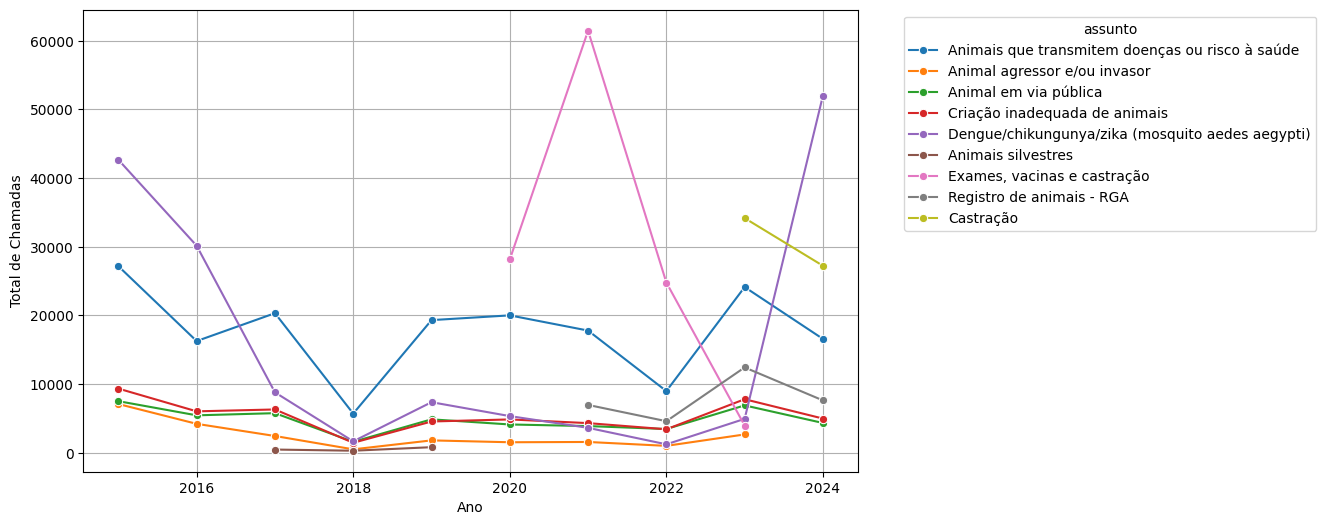

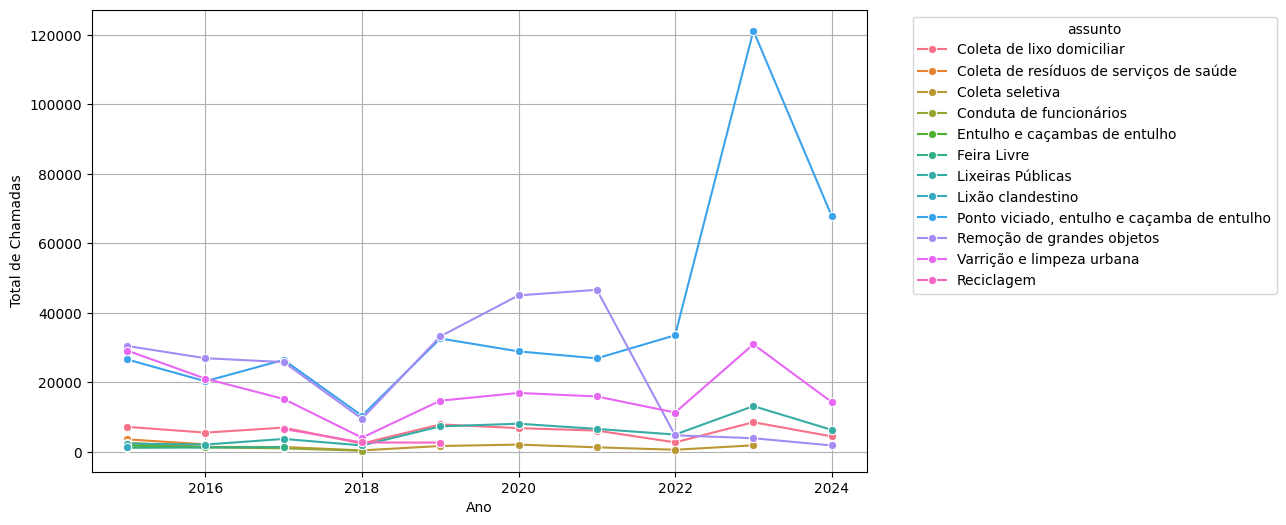

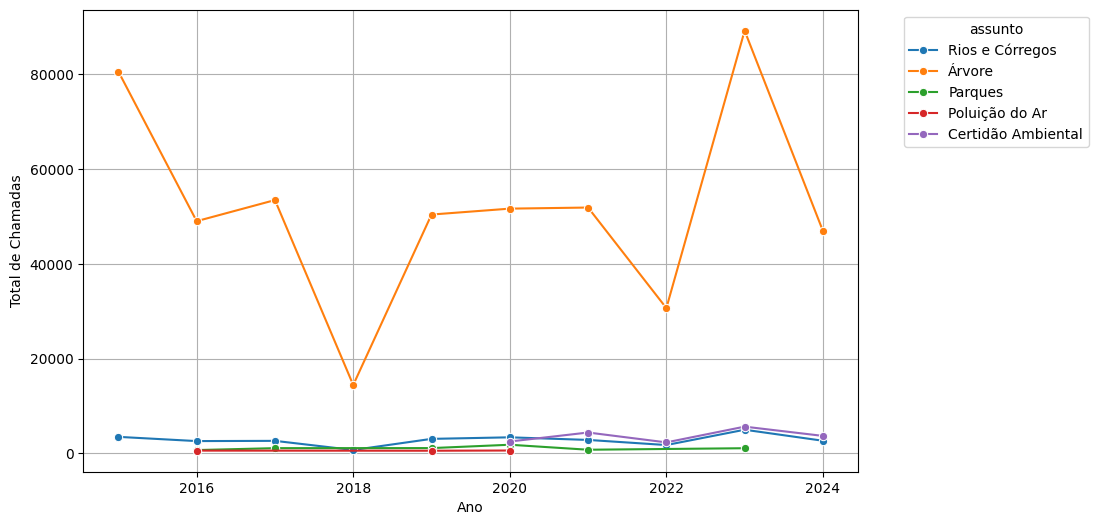

In [30]:
chart(
    aggregated=aggregated_theme_data, 
    by=['year', 'tema'], 
    hue='tema', 
    title='Tendência na Quantidade de Chamadas por Tema ao Longo dos Anos'
)

chart(
    aggregated=aggregated_topic_data[aggregated_topic_data['tema'] == 'Cidadania e assistência social'], 
    by=['year', 'tema', 'assunto'], 
    hue='assunto',
    limit=0.01,
    title='Tendência na Quantidade de Chamadas por Assunto pelo Tema "Cidadania e assistência social" ao Longo dos Anos'
)

chart(
    aggregated=aggregated_topic_data[aggregated_topic_data['tema'] == 'Rua e bairro'], 
    by=['year', 'tema', 'assunto'], 
    hue='assunto',
    limit=0.01,
    title='Tendência na Quantidade de Chamadas por Assunto pelo Tema "Rua e bairro" ao Longo dos Anos'
)

chart(
    aggregated=aggregated_topic_data[aggregated_topic_data['tema'] == 'Animais'], 
    by=['year', 'tema', 'assunto'], 
    hue='assunto',
    limit=0.01,
    title='Tendência na Quantidade de Chamadas por Assunto pelo Tema "Animais" ao Longo dos Anos'
)

chart(
    aggregated=aggregated_topic_data[aggregated_topic_data['tema'] == 'Lixo e limpeza'], 
    by=['year', 'tema', 'assunto'], 
    hue='assunto',
    limit=0.01,
    title='Tendência na Quantidade de Chamadas por Assunto pelo Tema "Lixo e limpeza" ao Longo dos Anos'
)

chart(
    aggregated=aggregated_topic_data[aggregated_topic_data['tema'] == 'Meio Ambiente'], 
    by=['year', 'tema', 'assunto'], 
    hue='assunto',
    limit=0.01,
    title='Tendência na Quantidade de Chamadas por Assunto pelo Tema "Meio Ambiente" ao Longo dos Anos'
)

In [8]:
animais = pd.read_csv('../data/final/Animais.csv', sep=';')
rua_e_bairro = pd.read_csv('../data/final/Rua e bairro.csv', sep=';')
meio_ambiente = pd.read_csv('../data/final/Meio Ambiente.csv', sep=';')
lixo_e_limpeza = pd.read_csv('../data/final/Lixo e limpeza.csv', sep=';')
cidadania = pd.read_csv('../data/final/Cidadania e assistência social.csv', sep=';')

/tmp/ipykernel_46951/3107990430.py:1: DtypeWarning: Columns (7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  animais = pd.read_csv('../data/final/Animais.csv', sep=';')
/tmp/ipykernel_46951/3107990430.py:2: DtypeWarning: Columns (7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  rua_e_bairro = pd.read_csv('../data/final/Rua e bairro.csv', sep=';')
/tmp/ipykernel_46951/3107990430.py:3: DtypeWarning: Columns (7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  meio_ambiente = pd.read_csv('../data/final/Meio Ambiente.csv', sep=';')
/tmp/ipykernel_46951/3107990430.py:4: DtypeWarning: Columns (7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  lixo_e_limpeza = pd.read_csv('../data/final/Lixo e limpeza.csv', sep=';')
/tmp/ipykernel_46951/3107990430.py:5: DtypeWarning: Columns (7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
 

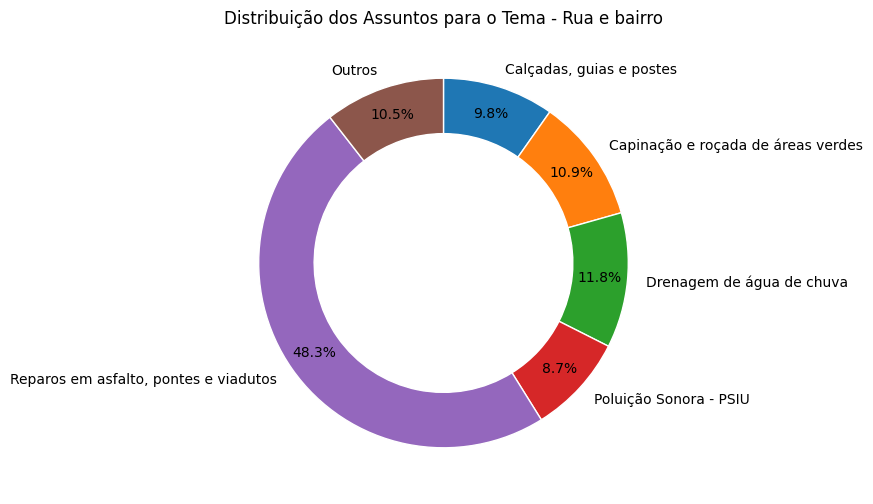

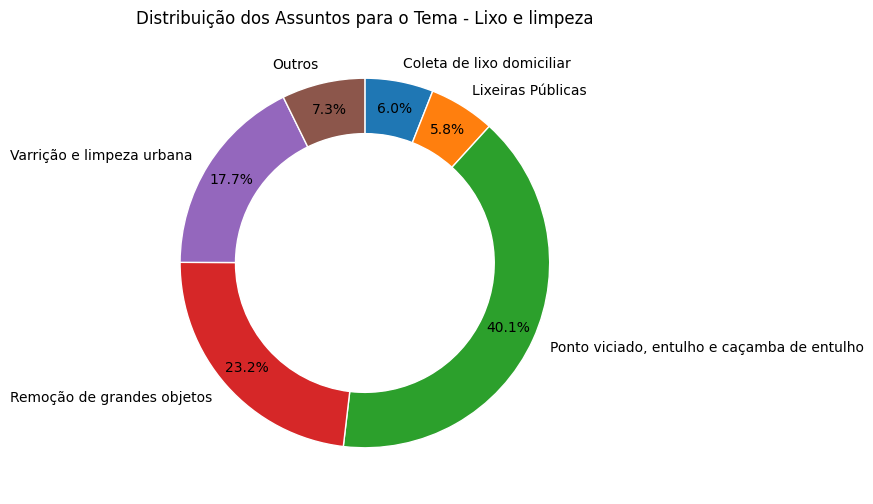

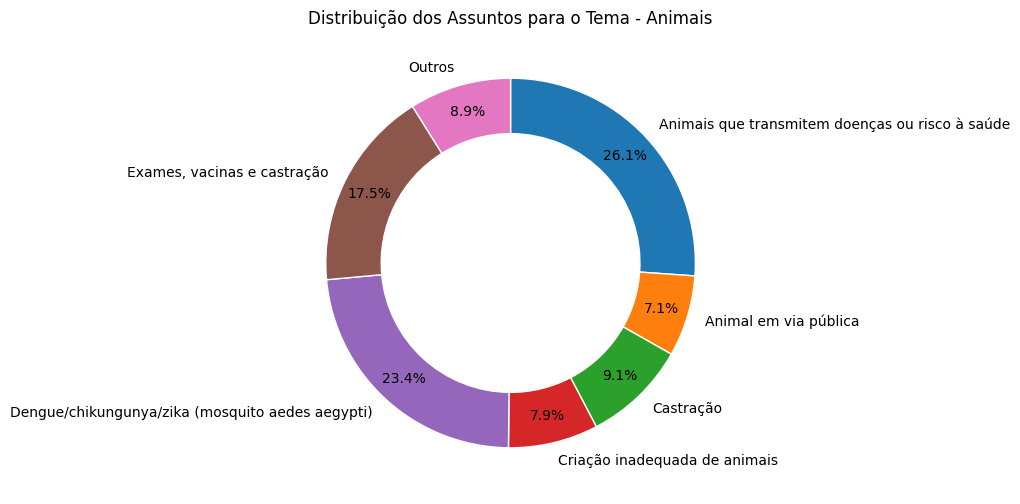

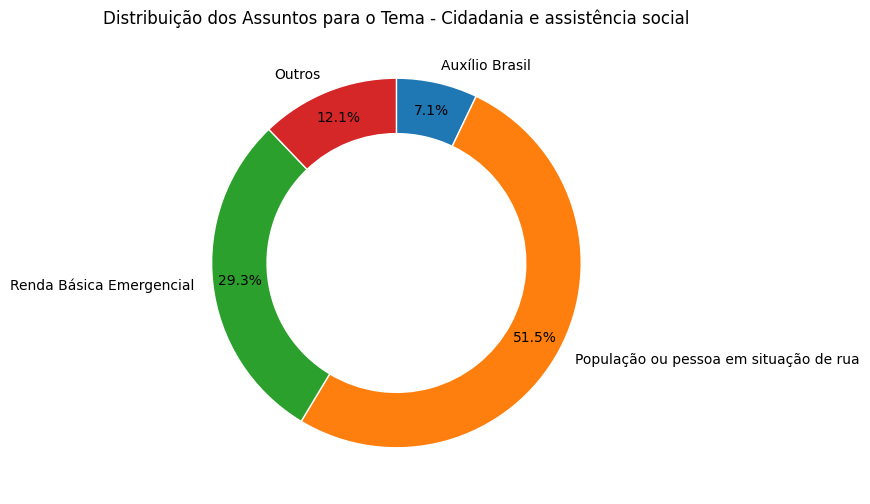

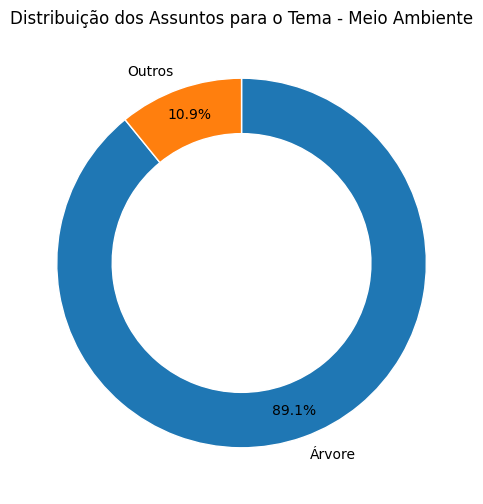

In [9]:
plot_donut_chart(rua_e_bairro, 'Distribuição dos Assuntos para o Tema')
plot_donut_chart(lixo_e_limpeza, 'Distribuição dos Assuntos para o Tema')
plot_donut_chart(animais, 'Distribuição dos Assuntos para o Tema')
plot_donut_chart(cidadania, 'Distribuição dos Assuntos para o Tema')
plot_donut_chart(meio_ambiente, 'Distribuição dos Assuntos para o Tema')